In [ ]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.layers import Input , Lambda , Dense , Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing.image import ImageDataGenerator , load_img
from glob import glob

In [ ]:
#Resizing all the images

Image_Size = [224,224]

train_path = '/content/drive/MyDrive/data/train'
test_path = '/content/drive/MyDrive/data/test'

In [ ]:
#Importing the library
import tensorflow
inception =tensorflow.keras.applications.InceptionV3(input_shape=Image_Size + [3], weights='imagenet', include_top=False)

In [ ]:
# don't train existing weights
for layer in inception.layers:
    layer.trainable = False

In [ ]:
# useful for getting number of output classes
folders = glob('/content/drive/MyDrive/data/train/*')

In [ ]:
len(folders)

4

In [ ]:
# our layers - you can add more if you want
x = Flatten()(inception.output)


In [ ]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=inception.input, outputs=prediction)

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d_94 (Conv2D)              (None, 111, 111, 32) 864         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_94 (BatchNo (None, 111, 111, 32) 96          conv2d_94[0][0]                  
__________________________________________________________________________________________________
activation_94 (Activation)      (None, 111, 111, 32) 0           batch_normalization_94[0][0]     
______________________________________________________________________________________________

In [ ]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/data/train/',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 1951 images belonging to 4 classes.


In [ ]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/data/test/',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')


Found 18 images belonging to 4 classes.


In [ ]:
#Fit the model

r = model.fit_generator(
    training_set,
    validation_data = test_set,
    epochs = 20,
    steps_per_epoch = len(training_set),
    validation_steps = len(test_set)
)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
61/61 [==============================] - 45s 633ms/step - loss: 6.0224 - accuracy: 0.5313 - val_loss: 1.0499 - val_accuracy: 0.8333
Epoch 2/20
61/61 [==============================] - 35s 567ms/step - loss: 0.5728 - accuracy: 0.8946 - val_loss: 0.0572 - val_accuracy: 1.0000
Epoch 3/20
61/61 [==============================] - 34s 561ms/step - loss: 0.4057 - accuracy: 0.9132 - val_loss: 0.0096 - val_accuracy: 1.0000
Epoch 4/20
61/61 [==============================] - 34s 563ms/step - loss: 0.4256 - accuracy: 0.9286 - val_loss: 0.0125 - val_accuracy: 1.0000
Epoch 5/20
61/61 [==============================] - 34s 560ms/step - loss: 0.5036 - accuracy: 0.9138 - val_loss: 3.4467e-04 - val_accuracy: 1.0000
Epoch 6/20
61/61 [==============================] - 34s 561ms/step - loss: 0.2817 - accuracy: 0.9503 - val_loss: 0.0835 - val_accuracy: 0.9444
Epoch 7/20
61/61 [==============================] - 34s 562ms/step - loss: 0.5318 - accuracy: 0.9282 - val_loss: 0.0285 - val_accuracy: 1.

In [ ]:
import matplotlib.pyplot as plt


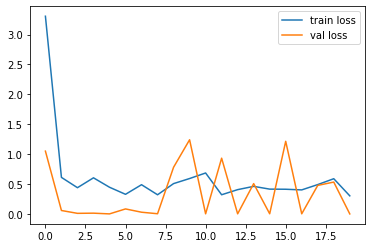

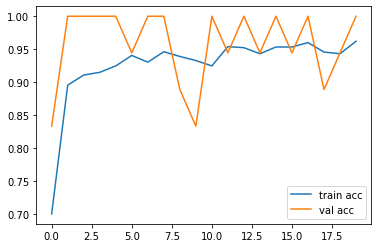

<Figure size 432x288 with 0 Axes>

In [ ]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
#Save the Model
model.save("model_inceptionv3.h5")